In [1]:
import numpy as np

import os

from os import listdir
from PIL import Image
from os.path import isdir
from matplotlib import pyplot
from numpy import load
from numpy import savez_compressed
from numpy import asarray
from numpy import expand_dims


import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN


from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers import Input

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle

In [2]:
import os

folder_path = 'baroakh4/validation/senyum'  # Ganti dengan path folder yang berisi file yang ingin diubah

# Mengambil daftar file dalam folder
file_list = os.listdir(folder_path)

# Mengurutkan file berdasarkan nama
sorted_files = sorted(file_list)

# Mengubah nama file menjadi bilangan angka yang berurutan
for i, file_name in enumerate(sorted_files):
    file_extension = os.path.splitext(file_name)[1]  # Mendapatkan ekstensi file
    new_file_name = str(i + 1) + file_extension  # Membuat nama baru dengan bilangan angka yang berurutan
    os.rename(os.path.join(folder_path, file_name), os.path.join(folder_path, new_file_name))


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'baroakh4/validation/senyum'

In [4]:
import os
import random
import shutil

folder_path = 'barokah9/training/normal'  # Ganti dengan path folder yang berisi file

# Mengambil daftar file dalam folder
file_list = os.listdir(folder_path)

# Mengambil 100 file secara acak
random_files = random.sample(file_list, 80)

# Membuat folder baru untuk menyimpan file yang dipilih secara acak
output_folder = 'barokah9/validation/normal'  # Ganti dengan path folder tujuan
os.makedirs(output_folder, exist_ok=True)

# Menyalin file yang dipilih secara acak ke folder tujuan
for file_name in random_files:
    file_path = os.path.join(folder_path, file_name)
    output_path = os.path.join(output_folder, file_name)
    shutil.move(file_path, output_path)

print("Berhasil mengambil 500 file secara acak.")


Berhasil mengambil 500 file secara acak.


In [2]:
face_detector = MTCNN()
MyFaceNet =load_model('facenet_keras.h5')

In [3]:
def create_signature(directory):
    signatures = list()
    
    for filename in listdir(directory):
        img_path = os.path.join(directory, filename)
        gbr1 = cv2.imread(img_path)
        
        wajah = face_detector.detect_faces(gbr1)
        
        if len(wajah)>0:
             for face1 in wajah:
                x1, y1, width, height = face1['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height


                # Extract facial landmarks
                facial_landmarks = face1['keypoints']
                left_eye = facial_landmarks['left_eye']
                right_eye = facial_landmarks['right_eye']
                nose = facial_landmarks['nose']
                mouth_left = facial_landmarks['mouth_left']
                mouth_right = facial_landmarks['mouth_right']

                # Draw facial landmarks on the image
                cv2.circle(gbr1, left_eye, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, right_eye, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, nose, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, mouth_left, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, mouth_right, 5, (0, 0, 255), -1)


                # crop and resize the face
                gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
                gbr = Image.fromarray(gbr)
                gbr_array = asarray(gbr)

                face = gbr_array[y1:y2, x1:x2]
                face = Image.fromarray(face)
                face = face.resize((160,160))
                face = asarray(face)

                face = face.astype('float32')
                mean, std = face.mean(), face.std()
                face = (face - mean) /std

                face = expand_dims(face, axis=0)
                signature = MyFaceNet.predict(face)

                signatures.append(signature)
        
    return signatures


In [4]:
def load_dataset(directory):
    X,y = list(), list()
    
    for subdir in listdir(directory):
        path = directory + subdir + '/'
        
        if not isdir(path):
            continue
            
        signatures = create_signature(path)
        labels = [subdir for _ in range(len(signatures))]
        
        X.extend(signatures)
        y.extend(labels)
        
    return asarray(X), asarray(y)

In [5]:
# load train dataset
trainX, trainy = load_dataset('barokah8/training/')
print(trainX.shape, trainy.shape)
# load valid dataset
valX, valy = load_dataset('barokah8/validation/')
print(valX.shape, valy.shape)



(960, 1, 128) (960,)
(240, 1, 128) (240,)


In [6]:
trainy

array(['marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'mar

In [23]:
valy

array(['marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'norm

In [7]:
trainX=np.squeeze(trainX, axis=1)
valX=np.squeeze(valX, axis=1)

encoder = LabelEncoder()
encoder.fit(trainy)
encoded_Y = encoder.transform(trainy)

train_y = np_utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(valy)
encoded_Y = encoder.transform(valy)

val_y = np_utils.to_categorical(encoded_Y)



In [8]:
train_y
val_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [9]:
model = keras.Sequential()

model.add(layers.Dense(20, input_dim=128, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [10]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['acc'])

In [11]:

#history = model.fit(trainX, y, epochs=100, batch_size=251, validation_data=(testX, ty))
#history = model.fit(trainX, train_y, epochs=100, batch_size=64, validation_data=(trainX, train_y), verbose=1)


history = model.fit(trainX, train_y, epochs=100, batch_size=62, validation_data=(valX, val_y), verbose=1)




Epoch 1/100
16/16 [==============================] - 0s 18ms/step - loss: 1.1445 - acc: 0.3635 - val_loss: 1.0376 - val_acc: 0.4708
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 1.0451 - acc: 0.4677 - val_loss: 0.9834 - val_acc: 0.5208
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9932 - acc: 0.5083 - val_loss: 0.9375 - val_acc: 0.5750
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9525 - acc: 0.5365 - val_loss: 0.8935 - val_acc: 0.6000
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9133 - acc: 0.5615 - val_loss: 0.8541 - val_acc: 0.6000
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8742 - acc: 0.5906 - val_loss: 0.8186 - val_acc: 0.6375
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8408 - acc: 0.6031 - val_loss: 0.7860 - val_acc: 0.6583
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8087 - 

16/16 [==============================] - 0s 2ms/step - loss: 0.1015 - acc: 0.9792 - val_loss: 0.3825 - val_acc: 0.9167
Epoch 64/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0971 - acc: 0.9792 - val_loss: 0.3769 - val_acc: 0.9250
Epoch 65/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0936 - acc: 0.9792 - val_loss: 0.3916 - val_acc: 0.9125
Epoch 66/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0909 - acc: 0.9833 - val_loss: 0.3908 - val_acc: 0.9250
Epoch 67/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0884 - acc: 0.9844 - val_loss: 0.3910 - val_acc: 0.9333
Epoch 68/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0846 - acc: 0.9865 - val_loss: 0.3998 - val_acc: 0.9167
Epoch 69/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0824 - acc: 0.9844 - val_loss: 0.3959 - val_acc: 0.9250
Epoch 70/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0798 - acc: 0

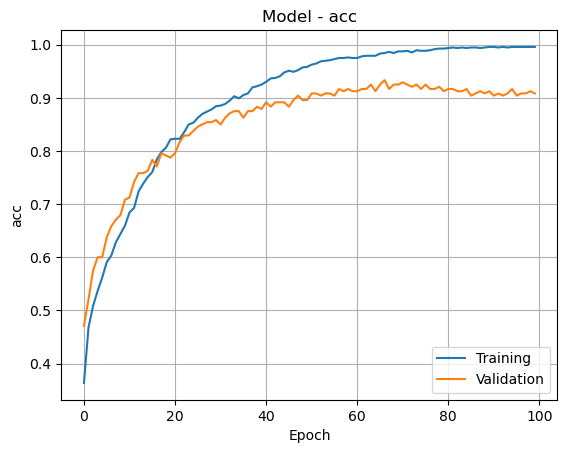

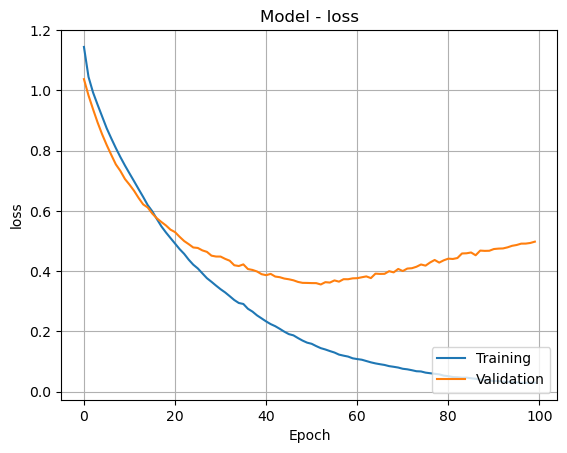

In [12]:
def evaluate_model_(history):
    names = [['acc', 'val_acc'], 
                 ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
       
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()
        
evaluate_model_(history)

In [13]:
model.save('MODEL_BARU4.h5' )

In [31]:
labels=['marah', 'normal', 'senyum']


modelSmile = load_model('MODEL_BARU5.h5')


In [32]:
print(trainX.shape,y.shape)

NameError: name 'y' is not defined

In [33]:
#prediksi semua kelas
y_pred = model.predict(testX)

NameError: name 'testX' is not defined

In [213]:
test_y.argmax(axis=1)[0] # get actual/target class

0

In [214]:
y_pred[0]

array([1.00e+00, 7.27e-07, 1.05e-05], dtype=float32)

In [215]:
y_pred.max(axis=1)[0]*100 

99.99887943267822

In [195]:
test_gene= ImageDataGenerator(rescale=1./255)
test_data_gene = test_gene.flow_from_directory('barokah/', target_size =(128,128),batch_size=334,shuffle=False)

Found 439 images belonging to 3 classes.


In [216]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

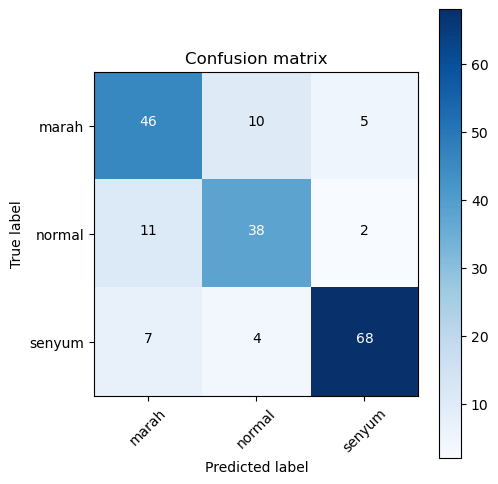

In [217]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix,classes=labels,normalize=False,
                      title='Confusion matrix')

In [218]:
print('hasil')
print(classification_report(test_y.argmax(axis=1),y_pred.argmax(axis=1),target_names=labels))

hasil
              precision    recall  f1-score   support

       marah       0.72      0.75      0.74        61
      normal       0.73      0.75      0.74        51
      senyum       0.91      0.86      0.88        79

    accuracy                           0.80       191
   macro avg       0.79      0.79      0.79       191
weighted avg       0.80      0.80      0.80       191



In [ ]:
def plot_confusion_matrix(cm, labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(trainX.argmax(axis=1),y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, labels,normalize=False,
                      title='Confusion matrix')

In [ ]:
prediksi= model.predict_generator(test_data_gene)
y_pred = np.argmax(prediksi, axis=1)

print ("confusion Matrix")
print(confusion_matrix(test_data_gene.labels,y_pred))

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('epochs')
plt.xlabel('accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
model.save('modelSmile.h5' )

In [ ]:
test_gene= ImageDataGenerator(rescale=1./255)
test_data_gene = test_gene.flow_from_directory('JR90/TR10/', target_size =(128,128),batch_size=80,shuffle=False)

In [ ]:
def create_signature(directory):
    signatures = list()
    
    for filename in listdir(directory):
        img_path = os.path.join(directory, filename)
        gbr1 = cv2.imread(img_path)
        
        wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
    
        if len(wajah)>0:
            x1, y1, width, height = wajah[0]        
        else:
            x1, y1, width, height = 1, 1, 10, 10
    
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height

        # crop and resize the face
        gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
        gbr = Image.fromarray(gbr)
        gbr_array = asarray(gbr)

        face = gbr_array[y1:y2, x1:x2]
        face = Image.fromarray(face)
        face = face.resize((160,160))
        face = asarray(face)

        face = face.astype('float32')
        mean, std = face.mean(), face.std()
        face = (face - mean) /std

        face = expand_dims(face, axis=0)
        signature = MyFaceNet.predict(face)

        signatures.append(signature)
        
    return signatures

In [46]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

def preprocess_images(images):
    preprocessed_images = []
    for img in images:
        # Resize image to desired dimensions (e.g., 160x160)
        resized_img = cv2.resize(img, (160, 160))
        
        # Convert image to RGB if it's in BGR format
        rgb_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        
        # Normalize image pixel values between 0 and 1
        normalized_img = rgb_img / 255.0
        
        # Add an extra dimension to represent the batch
        preprocessed_img = np.expand_dims(normalized_img, axis=0)
        
        preprocessed_images.append(preprocessed_img)
    return preprocessed_images

# Folder path containing the images
folder_path = "cob1/"

# Load images from the folder
images = load_images_from_folder(folder_path)

# Preprocess the images
preprocessed_images = preprocess_images(images)

# Concatenate the preprocessed images into a single array
input_data = np.concatenate(preprocessed_images, axis=0)

print("Input shape:", input_data.shape)


ValueError: need at least one array to concatenate

In [55]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    
    # Resize the image to the desired dimensions (e.g., 160x160)
    image = cv2.resize(image, (160, 160))
    
    # Convert the image to RGB if it's in BGR format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Normalize the pixel values between 0 and 1
    image = image / 255.0
    
    # Add an extra dimension to represent the batch
    image = np.expand_dims(image, axis=0)
    
    return image

# Path to the input image
image_path = "1.jpg"

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

print("Preprocessed image shape:", preprocessed_image.shape)


Preprocessed image shape: (1, 160, 160, 3)
